In [5]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import config

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [7]:
# OpenWeatherMap API Key
api_key = config.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | ilinskaya
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | karak
Processing Record 7 of Set 1 | crateus
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | kutum
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | tiarei
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | pierre
Processing Record 15 of Set 1 | somerset
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | jumla
Processing Record 18 of Set 1 | senno
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | sampit
Processing Record 24 o

Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | kieta
Processing Record 40 of Set 4 | le vauclin
Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | kajaani
Processing Record 45 of Set 4 | buraydah
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | kurmanayevka
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | narsaq
Processing Record 0 of Set 5 | rojhan
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | camacha
Processing Record 7 of Set 5 | manzanillo
Processing Record 8 of Set 5 | gushikawa
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | marcona
City not found. Skipping...
Processing Record 11 of Set 5 | cola

Processing Record 21 of Set 8 | nanortalik
Processing Record 22 of Set 8 | conakry
Processing Record 23 of Set 8 | cajabamba
Processing Record 24 of Set 8 | luwuk
Processing Record 25 of Set 8 | yaritagua
Processing Record 26 of Set 8 | mandali
Processing Record 27 of Set 8 | keuruu
Processing Record 28 of Set 8 | vylgort
City not found. Skipping...
Processing Record 29 of Set 8 | muroto
Processing Record 30 of Set 8 | podosinovets
Processing Record 31 of Set 8 | socorro
Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | kulunda
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | mulanje
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | kalianget
Processing Record 38 of Set 8 | mahajanga
Processing Record 39 of Set 8 | stoyba
City not found. Skipping...
Processing Record 40 of Set 8 | roald
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | kichmengskiy gorodok
Processing Record 43 of Set 8 | umzimvubu
C

Processing Record 1 of Set 12 | camocim
Processing Record 2 of Set 12 | tonk
Processing Record 3 of Set 12 | moree
Processing Record 4 of Set 12 | iberia
Processing Record 5 of Set 12 | batemans bay
Processing Record 6 of Set 12 | qorveh
Processing Record 7 of Set 12 | pergamino
Processing Record 8 of Set 12 | izhma
Processing Record 9 of Set 12 | nalut
Processing Record 10 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 11 of Set 12 | livramento
Processing Record 12 of Set 12 | hsinchu
Processing Record 13 of Set 12 | oranjemund
Processing Record 14 of Set 12 | altay
Processing Record 15 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 16 of Set 12 | tsabong
Processing Record 17 of Set 12 | shingu
Processing Record 18 of Set 12 | noumea
Processing Record 19 of Set 12 | tigil
Processing Record 20 of Set 12 | polson
Processing Record 21 of Set 12 | basoko
Processing Record 22 of Set 12 | shaoxing
Processing Record 23 of Set 12 | tawnat
City not found

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,49,AU,1562272224,98,-33.64,115.35,48.99,27.07
1,namibe,0,AO,1562272224,76,-15.19,12.15,69.94,7.40
2,new norfolk,90,AU,1562272224,93,-42.78,147.06,39.99,5.82
3,ilinskaya,0,RU,1562272224,81,45.72,40.72,65.51,4.83
4,barrow,84,AR,1562272225,74,-38.31,-60.23,40.17,12.64


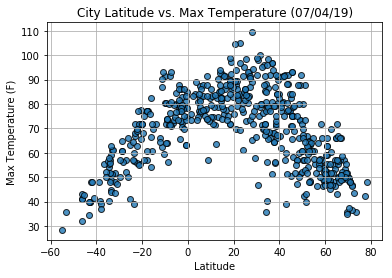

In [10]:
 # Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

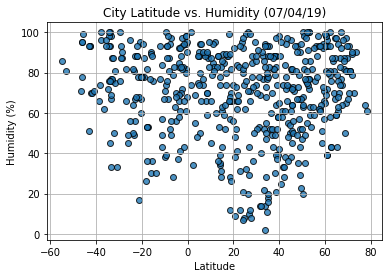

In [11]:
 # Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

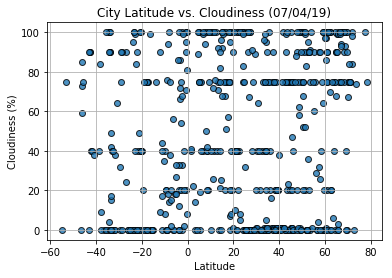

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

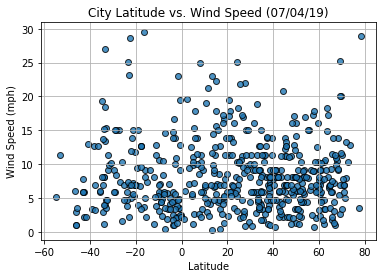

In [13]:
 # Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()